# Anlaysis of Premier League results data from 2013/14 to 2018/19
The Premier league is often considered one of the most competitive and entertaining football leagues in the world.

My objective of this mini-project is to look into some of the key features of the league and to present them visually.

In particular, i will seek to analyse the following:
- The difference between playing at home and playing away.
- The distribution of goals in games.
- Which teams can be considered the most best and most entertaining.

In [10]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
#Reading in the csv files containing data for each season.
df19 = pd.read_csv('english-premier-league_zip/archive/season-1819.csv') 
df18 = pd.read_csv('english-premier-league_zip/archive/season-1718.csv')
df17 = pd.read_csv('english-premier-league_zip/archive/season-1617.csv')
df16 = pd.read_csv('english-premier-league_zip/archive/season-1516.csv')
df15 = pd.read_csv('english-premier-league_zip/archive/season-1415.csv')
df14 = pd.read_csv('english-premier-league_zip/archive/season-1314.csv')

In [12]:
df19.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [17]:
#In order to make sense of the headings.
f = open('english-premier-league_zip/HeadingNotes.txt','r')
Heading = f.read()
f.close()
print(Heading)

Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php

Key to results data:

Div = League Division
Date = Match Date (dd/mm/yy)
HomeTeam = Home Team
AwayTeam = Away Team
FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit

In [18]:
#Subsetting the dataframes into concise dataframes containing relevant columns for my analysis.
df19 = df19[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR']]
df18 = df18[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR']]
df17 = df17[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR']]
df16 = df16[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR']]
df15 = df15[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR']]
df14 = df14[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR']]

In [19]:
#Adding column specifying the year.
df19['Year'] = '2018/19'
df18['Year'] = '2017/18'
df17['Year'] = '2016/17'
df16['Year'] = '2015/16'
df15['Year'] = '2014/15'
df14['Year'] = '2013/14'

#Dataframe containing data from all seasons.
df_all = pd.concat([df19,df18,df17,df16,df15,df14])
df_all.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Year
0,Man United,Leicester,2.0,1.0,H,1.0,0.0,H,2018/19
1,Bournemouth,Cardiff,2.0,0.0,H,1.0,0.0,H,2018/19
2,Fulham,Crystal Palace,0.0,2.0,A,0.0,1.0,A,2018/19
3,Huddersfield,Chelsea,0.0,3.0,A,0.0,2.0,A,2018/19
4,Newcastle,Tottenham,1.0,2.0,A,1.0,2.0,A,2018/19


In [20]:
#Checking to see if theres any null values that might affect our data.
df_all.isnull().sum()

HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HTHG        1
HTAG        1
HTR         1
Year        0
dtype: int64

In [21]:
#Finding rows with null values
is_NaN = df_all. isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = df_all[row_has_NaN]
print(rows_with_NaN)

    HomeTeam AwayTeam  FTHG  FTAG  FTR  HTHG  HTAG  HTR     Year
380      NaN      NaN   NaN   NaN  NaN   NaN   NaN  NaN  2014/15


We can see that all the null values are in the same row. Since we have over 2000 rows of data, the best thing to do would be to drop this row as it will not have much of an effect on our analysis.

In [22]:
#dropping the null row found above
df_all = df_all.dropna()
df15 = df15.dropna()
df_all.isnull().sum() 

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Year        0
dtype: int64

In [23]:
df_all.shape

(2280, 9)

# Anlaysis

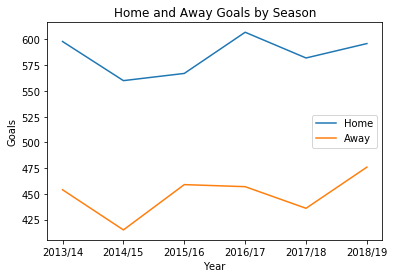

In [24]:
THG = df_all.groupby('Year')['FTHG'].sum() #Total home goals each season
TAG = df_all.groupby('Year')['FTAG'].sum() #Total away goals each season

plt.plot(THG, label = 'Home')
plt.plot(TAG, label = 'Away')
plt.legend()
plt.xlabel('Year'),plt.ylabel('Goals')
plt.title('Home and Away Goals by Season');

Year
2013/14    144.0
2014/15    145.0
2015/16    108.0
2016/17    150.0
2017/18    146.0
2018/19    120.0
dtype: float64


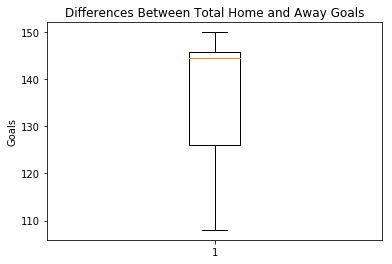

In [25]:
#Total diff. between home and away each season
Diff = THG-TAG
print(Diff)
plt.boxplot(Diff);
plt.title('Differences Between Total Home and Away Goals');
plt.ylabel('Goals');

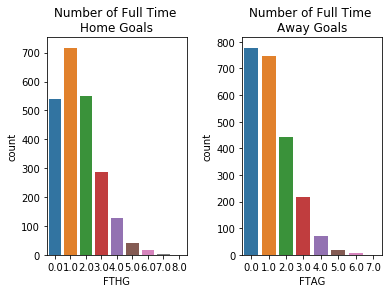

In [26]:
#Plots for Home and Away goals 
f, ax = plt.subplots(1, 2)
sns.countplot('FTHG',data=df_all,ax=ax[0]);
sns.countplot('FTAG',data=df_all,ax=ax[1]);
ax[0].set_title('Number of Full Time \nHome Goals');
ax[1].set_title('Number of Full Time \nAway Goals');
plt.subplots_adjust(wspace=0.4)

Mean FTG =  2.7223684210526318


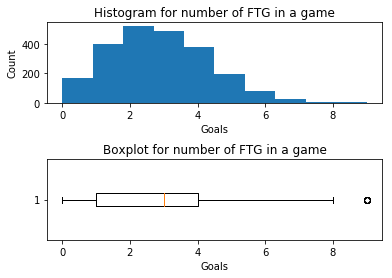

In [27]:
#Plots for Total goals in game
#Adding colum for FTG
df_all['FTG']=df_all['FTHG']+df_all['FTAG']

f, ax = plt.subplots(2,1)
ax[0].hist(df_all['FTG'],bins = 10);
ax[1].boxplot(df_all['FTG'],vert=False);
ax[0].set_title('Histogram for number of FTG in a game');
ax[1].set_title('Boxplot for number of FTG in a game');
ax[0].set_xlabel('Goals'),ax[1].set_xlabel('Goals')
ax[0].set_ylabel('Count')
plt.subplots_adjust(hspace=0.7)
print('Mean FTG = ',df_all['FTG'].mean())

In [28]:
#What were the outliers? These were matches with more than 8 goals
df_all[df_all['FTG']>8]

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Year,FTG
73,Man City,Stoke,7.0,2.0,H,3.0,1.0,H,2017/18,9.0
378,Tottenham,Leicester,5.0,4.0,H,1.0,2.0,A,2017/18,9.0
125,Swansea,Crystal Palace,5.0,4.0,H,1.0,1.0,D,2016/17,9.0
232,Everton,Bournemouth,6.0,3.0,H,3.0,0.0,H,2016/17,9.0
223,Norwich,Liverpool,4.0,5.0,A,2.0,1.0,H,2015/16,9.0
21,Everton,Chelsea,3.0,6.0,A,1.0,2.0,A,2014/15,9.0
154,Man City,Arsenal,6.0,3.0,H,2.0,1.0,H,2013/14,9.0
291,Cardiff,Liverpool,3.0,6.0,A,2.0,2.0,D,2013/14,9.0


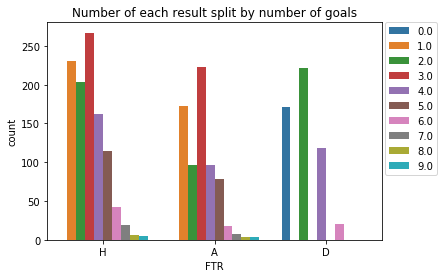

In [29]:
#fulltimegoals based on result
sns.countplot('FTR',hue='FTG',data = df_all)
plt.legend(bbox_to_anchor=(1.01,1),borderaxespad=0);
plt.title('Number of each result split by number of goals');

In [30]:
#Number of home wins away wins and draws in each season
HomeWins = df_all[df_all['FTR']=='H']
HomeWinsByYear = HomeWins.groupby('Year').FTR.count()

AwayWins = df_all[df_all['FTR']=='A']
AwayWinsByYear = AwayWins.groupby('Year').FTR.count()

Draws = df_all[df_all['FTR']=='D']
DrawsByYear = Draws.groupby('Year').FTR.count()

print('Home wins\n',HomeWinsByYear,"\n")
print('Away wins\n',AwayWinsByYear,"\n")
print('Draws\n',DrawsByYear)

Home wins
 Year
2013/14    179
2014/15    172
2015/16    157
2016/17    187
2017/18    173
2018/19    181
Name: FTR, dtype: int64 

Away wins
 Year
2013/14    123
2014/15    115
2015/16    116
2016/17    109
2017/18    108
2018/19    128
Name: FTR, dtype: int64 

Draws
 Year
2013/14     78
2014/15     93
2015/16    107
2016/17     84
2017/18     99
2018/19     71
Name: FTR, dtype: int64


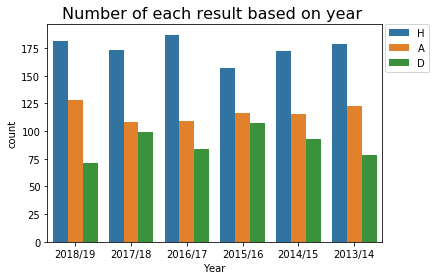

In [31]:
#graph showing the number of each result based on year
g = sns.countplot('Year',hue = 'FTR',data = df_all)

g.set_xlabel('Year')
g.set_title('Number of each result based on year ', fontsize=16);
g.legend(bbox_to_anchor=(1.01,1),borderaxespad=0);


In [32]:
#AVG Goals scored home/away by team across all seasons
HomeGoals = df_all.groupby('HomeTeam')['FTHG'].mean()
AwayGoals = df_all.groupby('AwayTeam')['FTAG'].mean()
print('Home goals per game\n', HomeGoals.nlargest(6),'\n')
print('Away goals per game\n', AwayGoals.nlargest(6),'\n')

Home goals per game
 HomeTeam
Man City     2.710526
Liverpool    2.289474
Arsenal      2.131579
Chelsea      2.061404
Tottenham    1.903509
Everton      1.754386
Name: FTHG, dtype: float64 

Away goals per game
 AwayTeam
Man City      2.000000
Liverpool     1.807018
Tottenham     1.684211
Arsenal       1.622807
Chelsea       1.561404
Man United    1.473684
Name: FTAG, dtype: float64 



In [33]:
# Total wins across all seasons 
HomeRecord = HomeWins.groupby('HomeTeam')['FTR'].count()
AwayRecord = AwayWins.groupby('AwayTeam')['FTR'].count()

print('Number of home wins:\n',HomeRecord.nlargest(6),'\n')
print('Number of away wins:\n',AwayRecord.nlargest(6))


Number of home wins:
 HomeTeam
Man City      88
Arsenal       80
Chelsea       75
Liverpool     75
Tottenham     73
Man United    68
Name: FTR, dtype: int64 

Number of away wins:
 AwayTeam
Man City      69
Chelsea       60
Liverpool     58
Tottenham     58
Man United    52
Arsenal       49
Name: FTR, dtype: int64


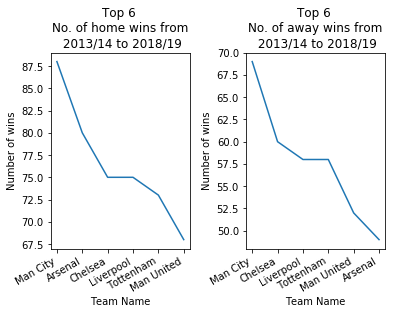

In [34]:
#plot of top teams home/away win record
f, ax = plt.subplots(1,2)
ax[0].plot(HomeRecord.nlargest(6));
ax[1].plot(AwayRecord.nlargest(6));

ax[0].set_title('Top 6 \nNo. of home wins from\n 2013/14 to 2018/19')
ax[1].set_title('Top 6 \nNo. of away wins from\n 2013/14 to 2018/19')
ax[0].set_xlabel('Team Name'),ax[1].set_xlabel('Team Name')
ax[0].set_ylabel('Number of wins'),ax[1].set_ylabel('Number of wins')
f.autofmt_xdate()
plt.subplots_adjust(wspace=0.4);


In [35]:
#Top 6 teams with most 4 or more home goal games.
MoreThan3HGoals = df_all[df_all['FTHG']>3]
print('Number of times each team scored more than 3 goals at home')
print(MoreThan3HGoals.groupby('HomeTeam')['FTHG'].sum().nlargest(6))

Number of times each team scored more than 3 goals at home
HomeTeam
Man City       153.0
Liverpool      126.0
Tottenham       83.0
Arsenal         73.0
Chelsea         67.0
Southampton     46.0
Name: FTHG, dtype: float64


In [36]:
#Top 6 teams with most 4 or more home goal games.
MoreThan3AGoals = df_all[df_all['FTAG']>3]
print('Number of times each team scored more than 3 goals away from home')
print(MoreThan3AGoals.groupby('AwayTeam')['FTAG'].sum().nlargest(6))


Number of times each team scored more than 3 goals away from home
AwayTeam
Man City      73.0
Liverpool     60.0
Tottenham     52.0
Chelsea       39.0
Arsenal       36.0
Man United    21.0
Name: FTAG, dtype: float64
